# Cars Dataset Analysis



Team Members: Akash Mishra, Rahul Bankey, Gopi Chand Yenkipalli, Surya Teja Pidakala, Shanmukh Peela, Hiranmai Vallabhaneni 

# Introduction and Overview

In this project, we will be using a dataset containing cars information from Kaggle.

Business Objective: This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of Car whether it is Cheap,Average or High.

The dataset consists of 10 independent variables i.e  Year,Make,Model,Condition,Tranmission,Cylinders,Fuel,Odometer,Engine Power,Milage.

Generally, the Price Range depends on these parameters. These parameters play a vital role in the predictive analysis of the price of the Car.

Usage:
The target variable is the Price of the Car. 

Target:
Cheap(0)
Average(1)
High(2)

The Target variable gives the information about the Price range of car whether it is Cheap,Average or High.

# Install and/or import necessary packages

Installation of the necessary packages and setting random seed

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as pltB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,f1_score,classification_report, make_scorer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

np.random.seed(1)

C:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Load, clean and prepare data for analysis

Read Cars file dataset

In [2]:
cars_df = pd.read_csv('Cars Dataset.csv')
cars_df.head(10)

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE POWER,MILAGE,Price
0,2011,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6,0
1,2012,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11,0
2,2009,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49,0
3,2011,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40,0
4,2008,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33,0
5,2013,ford,econoline,Excellent,Manual,8,gas,69163,Avg CC,38,0
6,2009,kia,borrego,Excellent,Automatic,6,gas,117018,High CC,5,0
7,2008,ford,f250 xl diesel,Excellent,Manual,8,diesel,294950,Low CC,44,0
8,2015,ram,promaster city,Excellent,Automatic,4,gas,26313,Avg CC,11,0
9,2016,chevrolet,silverado 1500,Excellent,Automatic,8,gas,12458,Avg CC,25,2


Exploration of the columns to check the columns in them

In [3]:
cars_df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION', 'CYLINDERS',
       'FUEL', 'ODOMETER', 'ENGINE POWER', 'MILAGE', 'Price'],
      dtype='object')

Check different values in the Target variable

In [4]:
cars_df.Price.value_counts()

0    7016
1    4763
2     297
Name: Price, dtype: int64

 Cleaning and Transforming the data

In [5]:
cars_df.columns = [s.strip().upper().replace(' ', '_') for s in cars_df.columns]

In [6]:
cars_df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION', 'CYLINDERS',
       'FUEL', 'ODOMETER', 'ENGINE_POWER', 'MILAGE', 'PRICE'],
      dtype='object')

In [7]:
cars_df.info

<bound method DataFrame.info of        YEAR       MAKE           MODEL  CONDITION TRANSMISSION  CYLINDERS  \
0      2011  chevrolet          camaro  Excellent    Automatic          6   
1      2012   chrysler  town & country  Excellent       Manual          6   
2      2009       jeep         liberty  Excellent       Manual          6   
3      2011      buick        lacrosse  Excellent       Manual          6   
4      2008  chevrolet          cobalt  Excellent    Automatic          4   
...     ...        ...             ...        ...          ...        ...   
12071  2015  chevrolet       silverado  Excellent       Manual          8   
12072  2018     toyota          tacoma  Excellent    Automatic          6   
12073  2017       ford        f-250 sd  Excellent       Manual          8   
12074  2017        ram   1500 crew cab  Excellent       Manual          8   
12075  2015        gmc          sierra  Excellent       Manual          8   

         FUEL  ODOMETER ENGINE_POWER  MILAG

Checking the null values in the columns

In [8]:
cars_df.isna().sum()

YEAR            0
MAKE            0
MODEL           0
CONDITION       0
TRANSMISSION    0
CYLINDERS       0
FUEL            0
ODOMETER        0
ENGINE_POWER    0
MILAGE          0
PRICE           0
dtype: int64

Checking the data types of the columns

In [9]:
cars_df.dtypes

YEAR             int64
MAKE            object
MODEL           object
CONDITION       object
TRANSMISSION    object
CYLINDERS        int64
FUEL            object
ODOMETER         int64
ENGINE_POWER    object
MILAGE           int64
PRICE            int64
dtype: object

Changing the object columns to categorical

In [10]:
cars_df['PRICE']=cars_df['PRICE'].astype('category')
cars_df['MAKE']=cars_df['MAKE'].astype('category')
cars_df['MODEL']=cars_df['MODEL'].astype('category')
cars_df['CONDITION']=cars_df['CONDITION'].astype('category')
cars_df['TRANSMISSION']=cars_df['TRANSMISSION'].astype('category')
cars_df['FUEL']=cars_df['FUEL'].astype('category')
cars_df['ENGINE_POWER']=cars_df['ENGINE_POWER'].astype('category')

In [11]:
cars_df.dtypes

YEAR               int64
MAKE            category
MODEL           category
CONDITION       category
TRANSMISSION    category
CYLINDERS          int64
FUEL            category
ODOMETER           int64
ENGINE_POWER    category
MILAGE             int64
PRICE           category
dtype: object

seprating the target values from the other variables

In [12]:
target = 'PRICE'
predictors = list(cars_df.columns)
predictors.remove(target)
cars_df.head()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE_POWER,MILAGE,PRICE
0,2011,chevrolet,camaro,Excellent,Automatic,6,gas,12200,Avg CC,6,0
1,2012,chrysler,town & country,Excellent,Manual,6,gas,111000,Low CC,11,0
2,2009,jeep,liberty,Excellent,Manual,6,gas,68650,Low CC,49,0
3,2011,buick,lacrosse,Excellent,Manual,6,gas,123562,High CC,40,0
4,2008,chevrolet,cobalt,Excellent,Automatic,4,gas,138001,Avg CC,33,0


In [13]:
print(predictors)

['YEAR', 'MAKE', 'MODEL', 'CONDITION', 'TRANSMISSION', 'CYLINDERS', 'FUEL', 'ODOMETER', 'ENGINE_POWER', 'MILAGE']


In [14]:
print(target)

PRICE


Fit and Transformation of the variables

In [15]:
temp=OrdinalEncoder()
#cars_df.YEAR=temp.fit_transform(cars_df[['YEAR']])
cars_df.MAKE=temp.fit_transform(cars_df[['MAKE']])
cars_df.MODEL=temp.fit_transform(cars_df[['MODEL']])
cars_df.CONDITION=temp.fit_transform(cars_df[['CONDITION']])
cars_df.TRANSMISSION=temp.fit_transform(cars_df[['TRANSMISSION']])
#cars_df.CYLINDERS=temp.fit_transform(cars_df[['CYLINDERS']])
#cars_df.ODOMETER=temp.fit_transform(cars_df[['ODOMETER']])
cars_df.FUEL=temp.fit_transform(cars_df[['FUEL']])
cars_df.ENGINE_POWER=temp.fit_transform(cars_df[['ENGINE_POWER']])
#cars_df.MILAGE=temp.fit_transform(cars_df[['MILAGE']])
cars_df.head(20)

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE_POWER,MILAGE,PRICE
0,2011,7.0,667.0,0.0,0.0,6,1.0,12200,0.0,6,0
1,2012,8.0,2777.0,0.0,1.0,6,1.0,111000,2.0,11,0
2,2009,21.0,1825.0,0.0,1.0,6,1.0,68650,2.0,49,0
3,2011,5.0,1786.0,0.0,1.0,6,1.0,123562,1.0,40,0
4,2008,7.0,801.0,0.0,0.0,4,1.0,138001,0.0,33,0
5,2013,13.0,1054.0,0.0,1.0,8,1.0,69163,0.0,38,0
6,2009,22.0,606.0,0.0,0.0,6,1.0,117018,1.0,5,0
7,2008,13.0,1432.0,0.0,1.0,8,0.0,294950,2.0,44,0
8,2015,32.0,2124.0,0.0,0.0,4,1.0,26313,0.0,11,0
9,2016,7.0,2468.0,0.0,0.0,8,1.0,12458,0.0,25,2


In [16]:
enc = LabelEncoder() 
cars_df[target]=enc.fit_transform(cars_df[target])
cars_df.dtypes

YEAR              int64
MAKE            float64
MODEL           float64
CONDITION       float64
TRANSMISSION    float64
CYLINDERS         int64
FUEL            float64
ODOMETER          int64
ENGINE_POWER    float64
MILAGE            int64
PRICE             int64
dtype: object

In [17]:
cars_df.head()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE_POWER,MILAGE,PRICE
0,2011,7.0,667.0,0.0,0.0,6,1.0,12200,0.0,6,0
1,2012,8.0,2777.0,0.0,1.0,6,1.0,111000,2.0,11,0
2,2009,21.0,1825.0,0.0,1.0,6,1.0,68650,2.0,49,0
3,2011,5.0,1786.0,0.0,1.0,6,1.0,123562,1.0,40,0
4,2008,7.0,801.0,0.0,0.0,4,1.0,138001,0.0,33,0


In [18]:
cars_df.describe()

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE_POWER,MILAGE,PRICE
count,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000,12076.000000
mean,2010.063183,17.613117,1589.043806,0.022607,0.400629,6.427708,0.850364,94208.968367,1.530142,27.543557,0.443607
std,9.202758,10.447140,895.049776,0.148653,0.490046,1.523097,0.356729,61173.220056,0.790420,13.202121,0.544089
min,1927.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,2007.000000,8.000000,866.000000,0.000000,0.000000,6.000000,1.000000,44299.500000,1.000000,16.000000,0.000000
50%,2012.000000,13.000000,1531.000000,0.000000,0.000000,6.000000,1.000000,88495.000000,2.000000,28.000000,0.000000
75%,2015.000000,27.000000,2467.000000,0.000000,1.000000,8.000000,1.000000,131903.000000,2.000000,39.000000,1.000000
max,2020.000000,38.000000,3075.000000,1.000000,1.000000,8.000000,1.000000,469000.000000,2.000000,50.000000,2.000000


In [19]:
cars_df['PRICE'].value_counts()

0    7016
1    4763
2     297
Name: PRICE, dtype: int64

In [20]:
cars_df.shape

(12076, 11)

# Partitioning data into training and test data sets


We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [21]:
# construct datasets for analysis
target = 'PRICE'
predictors = list(cars_df.columns)
predictors.remove(target)
X = cars_df[predictors]
y = cars_df[target]

In [22]:
# create the training set and the test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [23]:
y_train.value_counts()

0    4909
1    3338
2     206
Name: PRICE, dtype: int64

# Address any data imbalances

We will utilize an oversamplying technique to address any necessary date balancing.

In [24]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

In [25]:
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

2    4909
0    4909
1    4909
Name: PRICE, dtype: int64

Check whether the values of target are equal or not

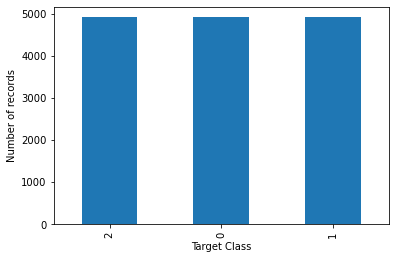

In [26]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

# Scaling the dataset

creating a standard scaler and fit it to the training set of predictors

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train a k-NN model

Since we know the k-NN models are very sensitive to differences in scale, we have rescaled our variables before fitting the model.

In [28]:
knn = KNeighborsClassifier(n_neighbors = int(len(y_train)**(1/2)), metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1707,  301,   99],
       [  98,  949,  378],
       [   1,   27,   63]], dtype=int64)

Checking the all the 4 paramters with average as 'micro', 'macro', 'weighted'

In [31]:
accuracy_score(y_test, y_pred)

0.7504830251173061

In [32]:
precision_score(y_test, y_pred, average='micro')

0.7504830251173061

In [33]:
precision_score(y_test, y_pred, average='macro')

0.6016657980171666

In [34]:
precision_score(y_test, y_pred, average='weighted')

0.8449082448606827

In [35]:
recall_score(y_test, y_pred, average='micro')

0.7504830251173061

In [36]:
recall_score(y_test, y_pred, average='macro')

0.7228097417920814

In [37]:
recall_score(y_test, y_pred, average='weighted')

0.7504830251173061

In [38]:
f1_score(y_test, y_pred, average='micro')

0.7504830251173061

In [39]:
f1_score(y_test, y_pred, average='macro')

0.5915340129075998

In [40]:
f1_score(y_test, y_pred, average='weighted')

0.7886998631514797

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      2107
           1       0.74      0.67      0.70      1425
           2       0.12      0.69      0.20        91

    accuracy                           0.75      3623
   macro avg       0.60      0.72      0.59      3623
weighted avg       0.84      0.75      0.79      3623



Checking for all the K values 

In [42]:
avg_method = 'weighted'
results = []
for avg_method in ['micro', 'macro', 'weighted']:
    for k in range(1,int(len(y_test)**0.5)*2,2): #k values from 1 to root of n
        knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        results.append({ 
            
                'avg_method': avg_method,
                'k':k,
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, average=avg_method, zero_division=0),
                'recall':recall_score(y_test, y_pred, average=avg_method),
                'f1': f1_score(y_test, y_pred, average=avg_method),
        })

In [43]:
results_df = pd.DataFrame(results)  
results_df

,avg_method,k,accuracy,precision,recall,f1
0,micro,1,0.855092,0.855092,0.855092,0.855092
1,micro,3,0.850952,0.850952,0.850952,0.850952
2,micro,5,0.844880,0.844880,0.844880,0.844880
3,micro,7,0.843776,0.843776,0.843776,0.843776
4,micro,9,0.837152,0.837152,0.837152,0.837152
...,...,...,...,...,...,...
175,weighted,111,0.754623,0.850145,0.754623,0.792949
176,weighted,113,0.756555,0.849790,0.756555,0.794127
177,weighted,115,0.756555,0.848956,0.756555,0.793870
178,weighted,117,0.754623,0.847526,0.754623,0.792135


In [45]:
#results_df.best_score_

 the best accuracy by Knn came out with k = 1 having value 85.5% with default paramaters.

## KNN with Hyperparameter tuning

As we can see from the confusion matrix that the values for TP,FP,FN,TN has a lot of difference, we are taking accuracy as it is the most contributing metric. 

In [48]:
print(int(len(y_test)**0.5)*2 )

120


In [49]:
grid_params = { 'n_neighbors' : list(range(1,120,2)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [50]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [51]:
g_res = gs.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


In [52]:
g_res.best_score_

0.938485261887895

In [53]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [54]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [55]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [56]:
from sklearn import metrics

In [57]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.85509246480817


In [58]:
cm = confusion_matrix(y_test, y_knn)
print(cm)

[[1881  216   10]
 [ 197 1186   42]
 [   5   55   31]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2107
           1       0.81      0.83      0.82      1425
           2       0.37      0.34      0.36        91

    accuracy                           0.86      3623
   macro avg       0.70      0.69      0.69      3623
weighted avg       0.85      0.86      0.85      3623



In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =10)

In [61]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.7937206115540144


As seen from the above method of hypertuning we can say that the model accuracy decreased from to 85% to 79% with k = 1.

# Decision Tree

Running Decision Tree algorithm 

In [62]:
cars_df

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE_POWER,MILAGE,PRICE
0,2011,7.0,667.0,0.0,0.0,6,1.0,12200,0.0,6,0
1,2012,8.0,2777.0,0.0,1.0,6,1.0,111000,2.0,11,0
2,2009,21.0,1825.0,0.0,1.0,6,1.0,68650,2.0,49,0
3,2011,5.0,1786.0,0.0,1.0,6,1.0,123562,1.0,40,0
4,2008,7.0,801.0,0.0,0.0,4,1.0,138001,0.0,33,0
...,...,...,...,...,...,...,...,...,...,...,...
12071,2015,7.0,2467.0,0.0,1.0,8,0.0,170781,2.0,48,1
12072,2018,36.0,2697.0,0.0,0.0,6,1.0,9561,2.0,37,1
12073,2017,13.0,1306.0,0.0,1.0,8,0.0,125780,2.0,33,1
12074,2017,32.0,33.0,0.0,1.0,8,1.0,21141,2.0,37,1


In [63]:
X = cars_df[predictors]
X

,YEAR,MAKE,MODEL,CONDITION,TRANSMISSION,CYLINDERS,FUEL,ODOMETER,ENGINE_POWER,MILAGE
0,2011,7.0,667.0,0.0,0.0,6,1.0,12200,0.0,6
1,2012,8.0,2777.0,0.0,1.0,6,1.0,111000,2.0,11
2,2009,21.0,1825.0,0.0,1.0,6,1.0,68650,2.0,49
3,2011,5.0,1786.0,0.0,1.0,6,1.0,123562,1.0,40
4,2008,7.0,801.0,0.0,0.0,4,1.0,138001,0.0,33
...,...,...,...,...,...,...,...,...,...,...
12071,2015,7.0,2467.0,0.0,1.0,8,0.0,170781,2.0,48
12072,2018,36.0,2697.0,0.0,0.0,6,1.0,9561,2.0,37
12073,2017,13.0,1306.0,0.0,1.0,8,0.0,125780,2.0,33
12074,2017,32.0,33.0,0.0,1.0,8,1.0,21141,2.0,37


In [64]:
y = cars_df[target]
y

0        0
1        0
2        0
3        0
4        0
        ..
12071    1
12072    1
12073    1
12074    1
12075    1
Name: PRICE, Length: 12076, dtype: int64

In [65]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size = 0.3,random_state = 1)

Creating the decision tree using the default parameters

In [66]:
dtree = DecisionTreeClassifier(random_state = 1)

Fitting the model to train the dataset

In [67]:
dtree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

# Review of the performance of the model on the validation/test data

In [68]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [69]:
print(dtree.get_depth())
print(dtree.get_n_leaves())

24
869


In [70]:
validation_predictions = dtree.predict(valid_X)
print('Confusion Matrix: ', confusion_matrix(valid_y, validation_predictions))
print('Accuracy score: ', accuracy_score(valid_y, validation_predictions))
print('Precision score: ', precision_score(valid_y, validation_predictions, average ='weighted', zero_division=0))
#precisionScore_sklearn_microavg = precision_score(valid_y, validation_predictions, average='macro')
print('Recall score: ', recall_score(valid_y, validation_predictions,average='weighted'))
print('F1 Score: \n', f1_score(valid_y, validation_predictions,average='weighted'))

Confusion Matrix:  [[1932  170    5]
 [ 184 1200   41]
 [   6   46   39]]
Accuracy score:  0.875241512558653
Precision score:  0.8743370500672324
Recall score:  0.875241512558653
F1 Score: 
 0.8747663096764084


In [71]:
train_predictions = dtree.predict(train_X)

print('Confusion Matrix:\n', confusion_matrix(train_y, train_predictions))
print('Accuracy score:\n', accuracy_score(train_y, train_predictions))
print('Precision score:\n', precision_score(train_y, train_predictions,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(train_y, train_predictions,average ='weighted'))
print('F1 Score: \n', f1_score(train_y, train_predictions,average ='weighted'))

Confusion Matrix:
 [[4909    0    0]
 [   0 3338    0]
 [   0    0  206]]
Accuracy score:
 1.0
Precision score:
 1.0
Recall score:
 1.0
F1 Score: 
 1.0


In [72]:
print(classification_report(valid_y, dtree.predict(valid_X), target_names=['1','0','2']))

              precision    recall  f1-score   support

           1       0.91      0.92      0.91      2107
           0       0.85      0.84      0.84      1425
           2       0.46      0.43      0.44        91

    accuracy                           0.88      3623
   macro avg       0.74      0.73      0.73      3623
weighted avg       0.87      0.88      0.87      3623



The accuracy of the model using the decision tree technique for validation is 87.5% and The accuracy of the model using the Decision tree technique for the test value is 1.

## Decision Tree with hyper paramater tuning

The below paramters are the one that could affect model fit.

1.criterion

2.max_depth

3.min_samples_split

4.min_samples_leaf

5.max_leaf_nodes

6.min_impurity_decrease

We have taken them into the consideration.

In [73]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 4000, 15)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 15)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, 15)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(valid_y), 15)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dtree_default = DecisionTreeClassifier(random_state=1)
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=1), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X, train_y)

In [75]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0005, 'max_leaf_nodes': 2588, 'max_depth': 2857, 'criterion': 'entropy'}


In [76]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 0.8900977800159471


As seen from the above hypertuning model of Decision tree the accuracy of the model has increased from 87.5% to 89.0%

# Test the performance of the model using identified parameters

In [77]:
validation_predictions = best_random_search_model.predict(valid_X)

print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[1710  299   98]
 [  97  954  374]
 [   1   27   63]]
Accuracy score:
 0.7526911399392768
Precision score:
 0.8461438978590637
Recall score:
 0.7526911399392768
F1 Score: 
 0.7905196321396081


In [78]:
random_search_best_params

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0005,
 'max_leaf_nodes': 2588,
 'max_depth': 2857,
 'criterion': 'entropy'}

In [79]:
dtree_accuracy = accuracy_score(valid_y, y_pred)

# Prediction with RandomForest (using default parameters)

Using random forest with default parameters

n_estimators: The number of trees in the forsest
    
A deeper tree might increase the performance, but also the complexity and chances to overfit.

The value must be an integer greater than 0. Default is 100.

max_depth: The maximum depth per tree.

Deeper trees might increase the performance, but also the complexity and chances to overfit.

The value must be an integer greater than 0. Default is None, which allows the tree to grow without constraint.

In [80]:
rforest = RandomForestClassifier(random_state=1)

In [81]:
_ = rforest.fit(train_X, train_y)

In [82]:
y_pred = rforest.predict(valid_X)

In [83]:
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print(f"{'Model':^18}{'Score':^18}")
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted',zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[1994  113    0]
 [ 118 1299    8]
 [   6   55   30]]
      Model             Score       
Accuracy score:
 0.9171956941760971
Precision score:
 0.915621287604534
Recall score:
 0.9171956941760971
F1 Score: 
 0.9139577579015159


# Prediction with RandomForest (using hyperparameter tuning)

In [84]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy', 'log_loss']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 4000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(valid_y), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }



In [85]:
rforest = RandomForestClassifier(random_state=1)

best_random_search_model = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=1), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 500, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X, train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1790 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1790 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User\anaconda3\lib\site-packages\j

In [86]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 42, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0011, 'max_leaf_nodes': 445, 'max_depth': None, 'criterion': 'entropy'}


In [87]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 0.8932898289199436


In [88]:
y_pred = best_random_search_model.predict(valid_X)
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))


Confusion Matrix:  [[1982  125    0]
 [ 152 1273    0]
 [   6   85    0]]
Accuracy score:
 0.8984267181893458
Precision score:
 0.8762488352717361
Recall score:
 0.8984267181893458
F1 Score: 
 0.8871679611517417


In [89]:
rforest_accuracy = accuracy_score(valid_y, y_pred)

The accuracy of random forest algorithm with default values came out to be 91% and with the usage of hyperparameter tuning it turned out to be 89.8% which is less than default values 

# Prediction with ADABoost (using default parameters)

Using ADA Boost:

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation).
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - Larger learning rates may not converge on a solution.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.

In [90]:
aboost = AdaBoostClassifier(random_state=1)

#aboost = AdaBoostClassifier(random_state=random_seed, base_estimator=DecisionTreeClassifier(max_depth=4, random_state=random_seed))
#aboost = AdaBoostClassifier(random_state=random_seed, n_estimators=1000)

In [91]:
_ = aboost.fit(train_X, train_y)

In [92]:
y_pred = aboost.predict(valid_X)

In [93]:
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))


Confusion Matrix:  [[1950  153    4]
 [ 206 1209   10]
 [   5   84    2]]
Accuracy score:
 0.8724813690311897
Precision score:
 0.8567732452978626
Recall score:
 0.8724813690311897
F1 Score: 
 0.8636176184001552


The accuracy score in ADABoost came out to be 87.2% with the default parameters.

# Prediction with ADABoost (using hyperparameter tuning)

In [94]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

n_estimators = [int(x) for x in np.linspace(1, 4000, 50)]
n_estimators.append(None)


learning_rate = [(0.97 + x / 100) for x in range(0, 10)]

# Create the random grid
param_grid_random = { #'criterion': criterion,
                      
                     'n_estimators': n_estimators,
                     'learning_rate': learning_rate,                     
                     #'algorithm': algorithm,                     
                      #'min_samples_split': min_samples_split,
                      #'min_samples_leaf' : min_samples_leaf,
                      #'max_leaf_nodes' : max_leaf_nodes,
                      #'min_impurity_decrease' : min_impurity_decrease,
                     }


In [95]:
estimator= AdaBoostClassifier(random_state= 1)
estimator.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [96]:
aboost = AdaBoostClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator= AdaBoostClassifier(random_state=1), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 50, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X, train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "C:\Users\User\an

In [97]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'n_estimators': 164, 'learning_rate': 1.0}


In [98]:
y_pred = best_random_search_model.predict(valid_X)
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[1934  170    3]
 [ 171 1240   14]
 [   4   78    9]]
Accuracy score:
 0.8785536847916091
Precision score:
 0.8697670315840778
Recall score:
 0.8785536847916091
F1 Score: 
 0.8722784512827153


The accuracy of the ADABoost with hyperparameter turned out to be 87.8% which is the sight increase then the default values 

In [99]:
aboost_accuracy = accuracy_score(valid_y, y_pred)

# Prediction with GradientBoostingClassifier (using default parameters)

In [100]:
gboost = GradientBoostingClassifier(random_state=1)

In [101]:
_ = gboost.fit(train_X, train_y)

In [102]:
y_pred = gboost.predict(valid_X)

In [103]:
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[1985  121    1]
 [ 127 1291    7]
 [   5   64   22]]
Accuracy score:
 0.9102953353574386
Precision score:
 0.9077419634586277
Recall score:
 0.9102953353574386
F1 Score: 
 0.9057950883416322


Accuracy score of Gradient Boost Classifier with default values is 91%.

# Prediction with GradientBoostingClassifier (using hyperparameter tuning)

In [104]:
# Criterion used to guide data splits
criterion = ['squared_error']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 4000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(valid_y), 50)]
max_leaf_nodes.append(None)
# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [105]:
gboost = GradientBoostingClassifier(random_state=1)

best_random_search_model = RandomizedSearchCV(
        estimator=GradientBoostingClassifier(random_state=1), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 125, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X, train_y)

In [106]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 378, 'min_samples_leaf': 21, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 2588, 'max_depth': 1633, 'criterion': 'squared_error'}


In [107]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 0.9027532278596109


In [108]:
y_pred = best_random_search_model.predict(valid_X)
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted',zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[1984  123    0]
 [ 138 1281    6]
 [   3   75   13]]
Accuracy score:
 0.9047750483025118
Precision score:
 0.9008243775216292
Recall score:
 0.9047750483025118
F1 Score: 
 0.8982197846116959


Accuracy score of Gradient Boost Classifier with hyperparameter tuning is 90% which is a slight decrease from the default values

In [109]:
gboost_accuracy = accuracy_score(valid_y, y_pred)

# Prediction with XGBoost (using default parameters)

In [110]:
xgboost = XGBClassifier(random_state=1)

In [111]:
_ = xgboost.fit(train_X, train_y)

[21:52:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [112]:
y_pred = xgboost.predict(valid_X)

In [113]:
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[2003  103    1]
 [ 116 1297   12]
 [   4   51   36]]
Accuracy score:
 0.9207838807617996
Precision score:
 0.9187195693276116
Recall score:
 0.9207838807617996
F1 Score: 
 0.9184372971921907


The accuracy of XGBoost algorithm with the default value is 92%.

# Prediction with XGBoostingClassifier (using hyperparameter tuning)

In [114]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 4000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 1000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(valid_y), 50)]
max_leaf_nodes.append(None)
# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [115]:
xgboost = XGBClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator=XGBClassifier(random_state=1), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 50, 
        cv=10, 
        verbose=1, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(train_X, train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:02:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "criterion", "max_leaf_nodes", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 32, 'min_samples_leaf': 877, 'min_impurity_decrease': 0.0043, 'max_leaf_nodes': 2957, 'max_depth': None, 'criterion': 'entropy'}


In [117]:
print('Best score is {}'.format(best_random_search_model.best_score_))

Best score is 0.921092925986543


The accuracy of XGBoost algorithm with the hyperparamter values is 92.1%.

In [119]:
y_pred = best_random_search_model.predict(valid_X)
print('Confusion Matrix: ', confusion_matrix(valid_y, y_pred))
print('Accuracy score:\n', accuracy_score(valid_y, y_pred))
print('Precision score:\n', precision_score(valid_y, y_pred,average ='weighted', zero_division=0))
print('Recall score:\n', recall_score(valid_y, y_pred,average ='weighted'))
print('F1 Score: \n', f1_score(valid_y, y_pred,average ='weighted'))

Confusion Matrix:  [[2003  103    1]
 [ 116 1297   12]
 [   4   51   36]]
Accuracy score:
 0.9207838807617996
Precision score:
 0.9187195693276116
Recall score:
 0.9207838807617996
F1 Score: 
 0.9184372971921907


In [120]:
xgboost_accuracy = accuracy_score(valid_y, y_pred)

In [121]:
print("Overall Accuracy scores...")
print(f"{'Decision Tree:':18}{dtree_accuracy}")
print(f"{'Random Forest:':18}{rforest_accuracy}")
print(f"{'Ada Boosted Tree:':18}{aboost_accuracy}")
print(f"{'Gradient Tree:':18}{gboost_accuracy}")
print(f"{'XGBoost Tree:':18}{xgboost_accuracy}")

Overall Accuracy scores...
Decision Tree:    0.7526911399392768
Random Forest:    0.8984267181893458
Ada Boosted Tree: 0.8785536847916091
Gradient Tree:    0.9047750483025118
XGBoost Tree:     0.9207838807617996


# Analysis and Bussiness Impact Summary

There is a common trend that can be seen throughout our analysis of all the model. The quality of data in the dataset seems to  good. Nearly all the models have same accuracy with minor differences leaving the decision tree.

To conclude, XGBoost model was the best fit model as it has the highest accuracy score compared to the rest with an accuracy scores. XGBoost accuracy was 92.0%. As the accuracy value is very high we can assume that all the independent vaiables taken here are affecting and explaining the dependent variable 'Price' which is a multiclass classifier.

Based on the above conclusion, as the XGBoost has the best model fit a person can take this into consideration and go ahead to predict the price of the car he wants to purchase. 